In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ModelTree import ModelTree  # Ensure this library is installed or available

class LogisticRegr:
    def __init__(self):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(penalty="l2", solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = np.unique(y)
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return np.full(len(X), self.flag_y_pred, dtype=int)
        else:
            return self.model.predict(X)

    def predict_proba(self, X):
        if self.flag:
            return np.zeros((len(X), 2))  # Default probabilities for a single class
        else:
            return self.model.predict_proba(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

# Load dataset
dataset = pd.read_csv('cleve.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  # Assuming the target variable is in the last column

# Handle missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 11:13] = imputer.fit_transform(X[:, 11:13])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Exploring the dataset
print(dataset.describe())

# Number of Decision Tree estimators
def get_stats(model, X_train, X_test, y_train, y_test):
    estimators = 5
    y_pred = []
    n_train_split = len(X_train) // estimators
    initial_train = 0
    final_train = 0

    yy_pred = []

    for i in range(1, estimators + 1):
        classifier = model()
        final_train = i * n_train_split
        temp_X_train = X_train[initial_train:final_train]
        temp_y_train = y_train[initial_train:final_train]

        L = ModelTree(classifier, max_depth=20, min_samples_leaf=10)
        node = L.fit(temp_X_train, temp_y_train, verbose=False)
        classifier = node["model"]

        y_pred_temp = L.predict(X_test)
        yy_pred.append(y_pred_temp)

    # Majority voting
    for j in range(len(yy_pred[0])):
        curr = [yy_pred[i][j] for i in range(len(yy_pred))]
        a = curr.count(0)
        b = curr.count(1)
        y_pred.append(0 if a > b else 1)

    # Metrics
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


ModuleNotFoundError: No module named 'ModelTree'

In [ ]:
class RidgeRegr:
    def __init__(self):
        from sklearn.linear_model import RidgeClassifier
        self.model = RidgeClassifier()
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = np.unique(y)
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return np.full(len(X), self.flag_y_pred, dtype=int)
        else:
            return self.model.predict(X)

    def predict_proba(self, X):
        if self.flag:
            return np.zeros((len(X), 2))
        else:
            return np.zeros((len(X), 2))

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

In [ ]:
class SVMRegr:
    def __init__(self):
        from sklearn.svm import SVC
        self.model = SVC(kernel='rbf', probability=True)
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = np.unique(y)
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return np.full(len(X), self.flag_y_pred, dtype=int)
        else:
            return self.model.predict(X)

    def predict_proba(self, X):
        if self.flag:
            return np.zeros((len(X), 2))
        else:
            return self.model.predict_proba(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error

class SGDRegr:
    def __init__(self):
        self.model = SGDClassifier(loss="log_loss")  # Log loss allows probability estimation
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = np.unique(y)
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return np.full(len(X), self.flag_y_pred, dtype=int)
        else:
            return self.model.predict(X)

    def predict_proba(self, X):
        if self.flag:
            return np.zeros((len(X), 2))
        else:
            return self.model.predict_proba(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)


Accuracy Score: 0.868421052631579
Confusion Matrix:
 [[41  6]
 [ 4 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.81      0.86      0.83        29

    accuracy                           0.87        76
   macro avg       0.86      0.87      0.86        76
weighted avg       0.87      0.87      0.87        76



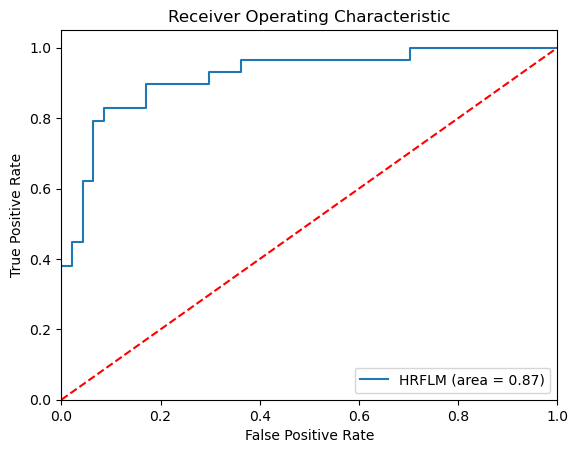

Accuracy Score: 0.8552631578947368
Confusion Matrix:
 [[42  5]
 [ 6 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.82      0.79      0.81        29

    accuracy                           0.86        76
   macro avg       0.85      0.84      0.85        76
weighted avg       0.85      0.86      0.85        76



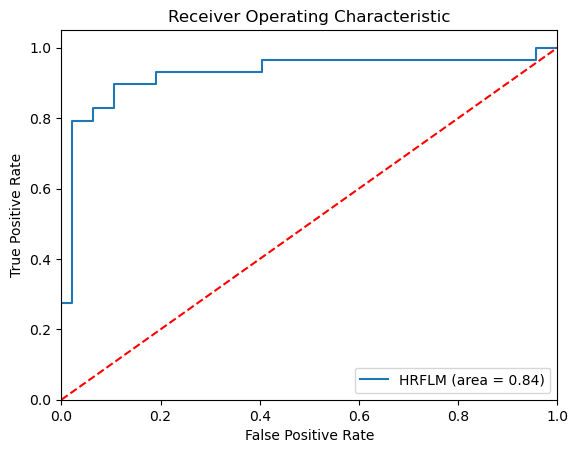

Accuracy Score: 0.7631578947368421
Confusion Matrix:
 [[34 13]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79        47
           1       0.65      0.83      0.73        29

    accuracy                           0.76        76
   macro avg       0.76      0.78      0.76        76
weighted avg       0.79      0.76      0.77        76



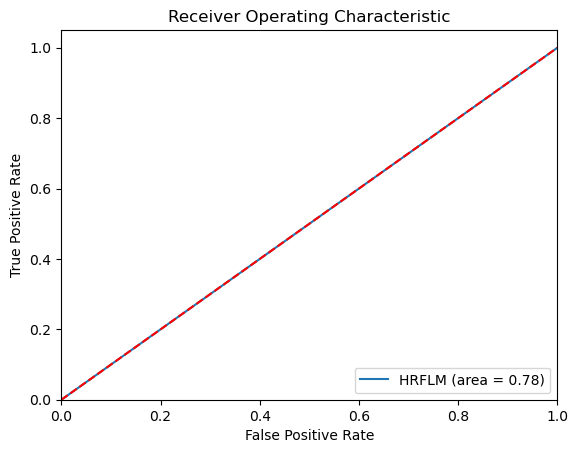

TypeError: 'str' object is not callable

In [ ]:
get_stats(LogisticRegr, X_train, X_test, y_train, y_test)
get_stats(SVMRegr, X_train, X_test, y_train, y_test)
get_stats(RidgeRegr, X_train, X_test, y_train, y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

def get_stats_no_model(X_train, X_test, y_train, y_test):

    models = {
        'Logistic Regression': LogisticRegression(solver='liblinear'),  # Ensure probability prediction support
        'K-Nearest Neighbors': KNeighborsClassifier(),
    }

    for name, classifier in models.items():
        print(f"Evaluating {name}...\n")

        # Train the model
        classifier.fit(X_train, y_train)

        # Predictions
        y_pred = classifier.predict(X_test)

        # Metrics
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # ROC Curve (only if classifier supports probability predictions)
        if hasattr(classifier, "predict_proba"):
            y_prob = classifier.predict_proba(X_test)[:, 1]  # Get probability for the positive class
            logit_roc_auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)

            plt.figure()
            plt.plot(fpr, tpr, label=f'{name} (AUC = {logit_roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        print("-" * 50)  # Separator for different models


Evaluating Logistic Regression...

Accuracy Score: 0.8421052631578947
Confusion Matrix:
 [[40  7]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.77      0.83      0.80        29

    accuracy                           0.84        76
   macro avg       0.83      0.84      0.83        76
weighted avg       0.85      0.84      0.84        76



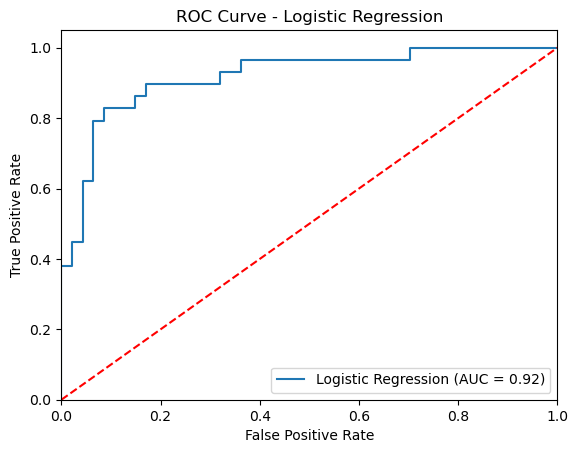

--------------------------------------------------
Evaluating K-Nearest Neighbors...

Accuracy Score: 0.8421052631578947
Confusion Matrix:
 [[38  9]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.74      0.90      0.81        29

    accuracy                           0.84        76
   macro avg       0.83      0.85      0.84        76
weighted avg       0.86      0.84      0.84        76



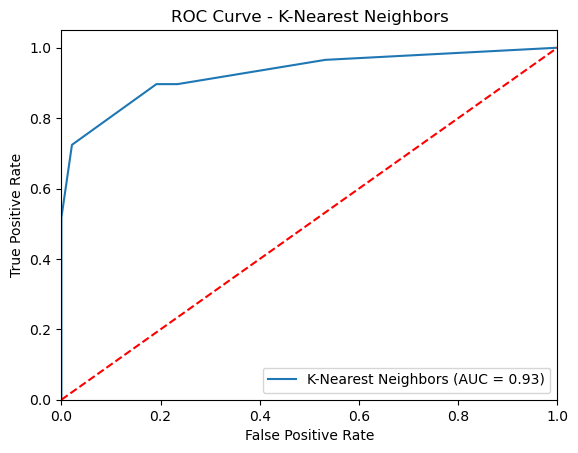

--------------------------------------------------


In [ ]:
get_stats_no_model(X_train, X_test, y_train, y_test)